In [18]:
import numpy as np
import matplotlib.pyplot as plt
import string

In [19]:
initial = np.loadtxt("initialStateDistribution.txt", dtype=float)
transition = np.loadtxt("transitionMatrix.txt", dtype=float)
emission = np.loadtxt("emissionMatrix.txt", dtype=float)
observations = np.loadtxt("observations.txt", dtype=int)

In [20]:
n, m, T = 27, 2, 430000
alphabet = dict(zip(range(1,28), string.ascii_lowercase + ' '))

In [21]:
L = np.zeros((n,T))
F = np.zeros((n,T))
L[:,0] = np.log(initial[0]) + np.log(emission[:,observations[0]])
F[:,0] = initial
s = np.full(T, -1, dtype=int)

In [15]:
def viterbi(F, L, transition, emission, observations, s):
    # Fill F and L
    for t in range(1,T):
        for i in range(n):
            logexp = L[:,t-1] + np.log(transition[:,i])
            max = np.argmax(logexp)
            max_logexp = logexp[max]
            F[i,t] = max
            L[i,t] = max_logexp + np.log(emission[i,observations[t]])
    for t in range(T-1,-1,-1):
        if t == T-1:
            s[t] = np.argmax(L[:,T-1])
        else:
            s[t] = F[s[t+1], t+1]
    word = []
    for t in range(T-1):
        if s[t] != s[t+1]:
            word.append(alphabet.get(s[t]+1))
    word.append(alphabet.get(s[T-1]+1))
    word = ''.join(word)
    return word, s

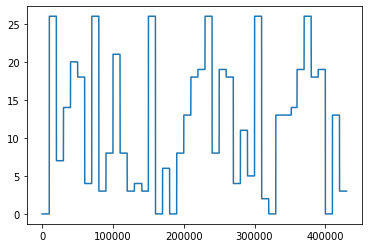

a house divided against itself canot stand


In [16]:
word, S = viterbi(F, L, transition, emission,observations, s)
plt.plot(S)
plt.show()
print(word)